In [9]:
from PIL import Image, ImageDraw

# Create a 256x256 pixel image
image = Image.new('RGB', (256, 256))
draw = ImageDraw.Draw(image)

# Generate a gradient of colors from left to right
for i in range(256):
    color = (i, 0, 255 - i)  # RGB color with varying red and blue components
    draw.line([(i, 0), (i, 255)], fill=color, width=1)

# Save the image
image.save("universal_color_table.png")
image.show()


In [10]:
from PIL import Image, ImageOps
from IPython.display import display

# Create a universal color table
color_table = []
for r in range(0, 256, 51):
    for g in range(0, 256, 51):
        for b in range(0, 256, 51):
            color = (r, g, b)
            color_table.extend(color)

# Open and load the image you want to display
image = Image.open("Lena.png")  # Replace with the path to your image file

# Convert the image to RGB mode (if not already)
image = image.convert("RGB")

# Quantize the image to use the custom color table with error diffusion dithering
#To get the output as similar to input
quantized_image = ImageOps.posterize(image, 4)  # You can adjust the posterization level

# Display the quantized image in the Jupyter notebook
quantized_image.save("transform_universal.png")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


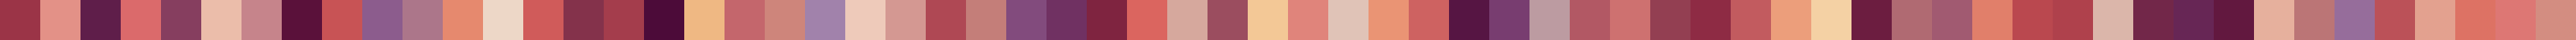

In [11]:
from PIL import Image, ImageDraw
import numpy as np
from sklearn.cluster import KMeans
from IPython.display import display

# Load the input image
input_image = Image.open("Lena.png")  # Replace with the path to your image file

# Convert the image to a NumPy array
image_array = np.array(input_image)

# Reshape the array to a list of RGB values
pixels = image_array.reshape(-1, 3)

# Determine the number of colors (K) you want in your adaptive color table
num_colors = 64  # Increase the number of colors here

# Fit K-Means clustering to the image data
kmeans = KMeans(n_clusters=num_colors, random_state=0).fit(pixels)

# Get the cluster centers as RGB values
cluster_centers = kmeans.cluster_centers_.astype(int)

# Create an image to display the adaptive color table
color_table_image = Image.new("RGB", (num_colors * 50, 50))  # Adjust width as needed
draw = ImageDraw.Draw(color_table_image)

# Draw color rectangles for each color in the adaptive color table
color_width = color_table_image.width // num_colors
for i, color in enumerate(cluster_centers):
    left = i * color_width
    right = (i + 1) * color_width
    draw.rectangle([left, 0, right, color_table_image.height], fill=tuple(color))

# Display the adaptive color table image in the Jupyter notebook
display(color_table_image)

# Save the adaptive color table image as a PNG file
color_table_image.save("adaptive_color_table.png")


In [12]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans

# Load the input image
input_image = Image.open("Lena.png")  # Replace with the path to your image file

# Convert the image to a NumPy array
image_array = np.array(input_image)

# Reshape the array to a list of RGB values
pixels = image_array.reshape(-1, 3)

# Determine the number of colors (K) you want in your adaptive color table
num_colors = 256  # You can adjust this number

# Fit KMeans clustering to the image data
kmeans = KMeans(n_clusters=num_colors, random_state=0).fit(pixels)

# Get the cluster centers as RGB values
cluster_centers = kmeans.cluster_centers_.astype(int)

# Create the adaptive color table
adaptive_color_table = cluster_centers.tolist()

# Convert the adaptive color table to a bytes object
color_table_bytes = bytes([val for color in adaptive_color_table for val in color])

# Create a new image with the adaptive color table
quantized_image = Image.new("P", input_image.size)
quantized_image.putpalette(color_table_bytes)
quantized_image.paste(input_image)
#Posterrize to make it look like original image
quantized_image = ImageOps.posterize(image, 6)

# Display the quantized image
quantized_image.save("transform_adaptive.png")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
